<a href="https://colab.research.google.com/github/AleAguirreM/Proyecto-ACCIDENTALIDAD-VIAL/blob/main/Streamlit_y_Modelos_Proyecto_Accidentalidad_Vial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import sqlite3 as sql
import plotly.graph_objs as go
import plotly.express as px
import sys
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Cargar datos historicosr
ruta_archivo='https://raw.githubusercontent.com/AleAguirreM/Proyecto-ACCIDENTALIDAD-VIAL/main/AMVA_Accidentalidad_20191022_2.csv'

In [3]:

df = pd.read_csv(ruta_archivo, sep=';',encoding='latin1')


In [4]:
df


,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO
0,79.0,BARBOSA,03/01/2015,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
1,79.0,BARBOSA,07/01/2015,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
2,79.0,BARBOSA,04/01/2015,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA
3,79.0,BARBOSA,05/01/2015,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
4,79.0,BARBOSA,11/01/2015,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
...,...,...,...,...,...,...,...,...,...,...,...
203445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203450 entries, 0 to 203449
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COD_MUNICIPIO       203435 non-null  float64
 1   MUNICIPIO           203435 non-null  object 
 2   FECHA               203435 non-null  object 
 3   HORA                203435 non-null  object 
 4   DÍA DE LA SEMANA    203435 non-null  object 
 5   CLASE               203435 non-null  object 
 6   DIRECCIÓN           203435 non-null  object 
 7   GRAVEDAÑOSSADAÑOSS  203435 non-null  object 
 8   BARRIO              203385 non-null  object 
 9   COMUNA              203435 non-null  object 
 10  DISEÑO              203435 non-null  object 
dtypes: float64(1), object(10)
memory usage: 17.1+ MB


In [6]:
print(df.columns)

Index(['COD_MUNICIPIO', 'MUNICIPIO', 'FECHA', 'HORA', 'DÍA DE LA SEMANA',
       'CLASE', 'DIRECCIÓN', 'GRAVEDAÑOSSADAÑOSS', 'BARRIO', 'COMUNA',
       'DISEÑO'],
      dtype='object')


In [7]:
df = df.rename(columns={
    'GRAVEDAÑOSSADAÑOSS': 'GRAVEDAD_DAÑOS',
    'DÍA DE LA SEMANA': 'DIA_SEMANA'
})

In [8]:
print("\nValores nulos por columna:\n")
print(df.isnull().sum())


Valores nulos por columna:

COD_MUNICIPIO     15
MUNICIPIO         15
FECHA             15
HORA              15
DIA_SEMANA        15
CLASE             15
DIRECCIÓN         15
GRAVEDAD_DAÑOS    15
BARRIO            65
COMUNA            15
DISEÑO            15
dtype: int64


In [9]:
df = df.dropna()

In [11]:

# Convertir FECHA a formato datetime
if 'FECHA' in df.columns:
    df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
    print(f"✓ Fecha convertida a formato datetime")

# Limpiar y estandarizar HORA
if 'HORA' in df.columns:
    # Primero convertir a string y limpiar
    df['HORA'] = df['HORA'].astype(str).str.strip()

    # Función para convertir hora
    def convertir_hora(hora_str):
        try:
            # Si ya es un objeto tiempo o datetime
            if isinstance(hora_str, (datetime, pd.Timestamp)):
                return hora_str.time()

            # Si está en formato HH:MM
            if ':' in hora_str and len(hora_str) <= 5:
                return pd.to_datetime(hora_str, format='%H:%M').time()

            # Si tiene segundos u otro formato
            return pd.to_datetime(hora_str, errors='coerce').time()

        except:
            return None

    df['HORA_LIMPIA'] = df['HORA'].apply(convertir_hora)
    df['HORA_STR'] = df['HORA_LIMPIA'].apply(lambda x: x.strftime('%H:%M') if x else None)
    print(f"✓ Hora limpiada y estandarizada")

✓ Fecha convertida a formato datetime


/tmp/ipython-input-3746209561.py:23: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(hora_str, errors='coerce').time()


✓ Hora limpiada y estandarizada


In [12]:
# Convertir FECHA a formato datetime
if 'FECHA' in df.columns:
    df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
    print(f"✓ Fecha convertida a formato datetime")

# Limpiar y estandarizar HORA
if 'HORA' in df.columns:
    # Primero convertir a string y limpiar
    df['HORA'] = df['HORA'].astype(str).str.strip()

    # Función para convertir hora
    def convertir_hora(hora_str):
        try:
            # Si ya es un objeto tiempo o datetime
            if isinstance(hora_str, (datetime, pd.Timestamp)):
                return hora_str.time()

            # Si está en formato HH:MM
            if ':' in hora_str and len(hora_str) <= 5:
                return pd.to_datetime(hora_str, format='%H:%M').time()

            # Si tiene segundos u otro formato
            return pd.to_datetime(hora_str, errors='coerce').time()

        except:
            return None

    df['HORA_LIMPIA'] = df['HORA'].apply(convertir_hora)
    df['HORA_STR'] = df['HORA_LIMPIA'].apply(lambda x: x.strftime('%H:%M') if x else None)
    print(f"✓ Hora limpiada y estandarizada")

# Estandarizar texto en columnas categóricas
if 'DÍA_SEMANA' in df.columns:
    df['DÍA_SEMANA'] = df['DÍA_SEMANA'].str.upper().str.strip()

if 'CLASE' in df.columns:
    df['CLASE'] = df['CLASE'].str.upper().str.strip()

if 'GRAVEDAD_DAÑOS' in df.columns:
    df['GRAVEDAD_DAÑOS'] = df['GRAVEDAD_DAÑOS'].str.upper().str.strip()

if 'BARRIO' in df.columns:
    df['BARRIO'] = df['BARRIO'].str.upper().str.strip()

if 'COMUNA' in df.columns:
    df['COMUNA'] = df['COMUNA'].str.upper().str.strip()

# 4. CREAR VARIABLES DERIVADAS
print("\n4. Creando variables derivadas...")

if 'FECHA' in df.columns:
    df['MES'] = df['FECHA'].dt.month
    df['DIA_SEMANA_NUM'] = df['FECHA'].dt.dayofweek
    df['DIA_MES'] = df['FECHA'].dt.day

if 'HORA_LIMPIA' in df.columns:
    df['HORA_NUM'] = df['HORA_LIMPIA'].apply(lambda x: x.hour if x else None)
    df['FRANJA_HORARIA'] = df['HORA_NUM'].apply(lambda x:
        'MADRUGADA (0-6)' if 0 <= x < 6 else
        'MAÑANA (6-12)' if 6 <= x < 12 else
        'TARDE (12-18)' if 12 <= x < 18 else
        'NOCHE (18-24)' if 18 <= x <= 24 else 'DESCONOCIDO'
    )



✓ Fecha convertida a formato datetime


/tmp/ipython-input-388550656.py:23: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(hora_str, errors='coerce').time()


✓ Hora limpiada y estandarizada

4. Creando variables derivadas...


In [13]:
sys.path.append('df.db')

In [14]:
conn = sql.connect("df.db")

In [15]:
# 3️⃣ Guardar el DataFrame en una tabla de SQLite
df.to_sql('mi_tabla', conn, if_exists='replace', index=False)


203385

In [16]:
curr = conn.cursor()


In [17]:
curr.execute("SELECT name FROM sqlite_master WHERE type = 'table'")

In [18]:
curr.fetchall()

[('mi_tabla',)]

In [19]:
pd.read_sql("select * from mi_tabla", conn)



,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DIA_SEMANA,CLASE,DIRECCIÓN,GRAVEDAD_DAÑOS,BARRIO,COMUNA,DISEÑO,HORA_LIMPIA,HORA_STR,MES,DIA_SEMANA_NUM,DIA_MES,HORA_NUM,FRANJA_HORARIA
0,79.0,BARBOSA,2015-01-03 00:00:00,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA,13:00:00.000000,13:00,1.0,5.0,3.0,13.0,TARDE (12-18)
1,79.0,BARBOSA,2015-01-07 00:00:00,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA,15:00:00.000000,15:00,1.0,2.0,7.0,15.0,TARDE (12-18)
2,79.0,BARBOSA,2015-01-04 00:00:00,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA,04:01:00.000000,04:01,1.0,6.0,4.0,4.0,MADRUGADA (0-6)
3,79.0,BARBOSA,2015-01-05 00:00:00,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA,12:00:00.000000,12:00,1.0,0.0,5.0,12.0,TARDE (12-18)
4,79.0,BARBOSA,2015-01-11 00:00:00,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA,13:30:00.000000,13:30,1.0,6.0,11.0,13.0,TARDE (12-18)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203380,631.0,SABANETA,2018-08-30 00:00:00,18:45:00,JUEVES,CHOQUE,CL 77 Sur CR 45,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN,18:45:00.000000,18:45,8.0,3.0,30.0,18.0,NOCHE (18-24)
203381,631.0,SABANETA,2018-08-30 00:00:00,18:45:00,JUEVES,CHOQUE,CL 77 Sur CR 45,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN,18:45:00.000000,18:45,8.0,3.0,30.0,18.0,NOCHE (18-24)
203382,631.0,SABANETA,2018-08-31 00:00:00,17:00:00,VIERNES,CAIDA OCUPANTE,CL 52 Sur CR 44,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN,17:00:00.000000,17:00,8.0,4.0,31.0,17.0,TARDE (12-18)
203383,631.0,SABANETA,2018-08-31 00:00:00,18:10:00,VIERNES,VOLCAMIENTO,CR 49 CL 51 Sur,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN,18:10:00.000000,18:10,8.0,4.0,31.0,18.0,NOCHE (18-24)


In [34]:
pd.read_sql("select * from mi_tabla where COD_MUNICIPIO = '1.0	' ", conn)

,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DIA_SEMANA,CLASE,DIRECCIÓN,GRAVEDAD_DAÑOS,BARRIO,COMUNA,DISEÑO,HORA_LIMPIA,HORA_STR,MES,DIA_SEMANA_NUM,DIA_MES,HORA_NUM,FRANJA_HORARIA
0,1.0,MEDELLÍN,2018-01-01 00:00:00,12:20 a. m.,LUNES,OTRO,CL 58 CR 25,HERIDOS,LOS MANGOS,VILLA HERMOSA,LOTE O PREDIO,00:20:00.000000,00:20,1.0,0.0,1.0,0.0,MADRUGADA (0-6)
1,1.0,MEDELLÍN,2018-01-01 00:00:00,12:20 a. m.,LUNES,CHOQUE,CR 50 B CL 81 A,HERIDOS,BRASILIA,ARANJUEZ,INTERSECCION,00:20:00.000000,00:20,1.0,0.0,1.0,0.0,MADRUGADA (0-6)
2,1.0,MEDELLÍN,2018-01-01 00:00:00,6:45 a. m.,LUNES,CHOQUE,CR 65 CL 10,HERIDOS,CAMPO AMOR,GUAYABAL,GLORIETA,06:45:00.000000,06:45,1.0,0.0,1.0,6.0,MAÑANA (6-12)
3,1.0,MEDELLÍN,2018-01-01 00:00:00,1:00 p. m.,LUNES,CHOQUE,CR 89 A CL 76,HERIDOS,AURES NO.1,ROBLEDO,TRAMO DE VIA,13:00:00.000000,13:00,1.0,0.0,1.0,13.0,TARDE (12-18)
4,1.0,MEDELLÍN,2018-01-01 00:00:00,1:30 p. m.,LUNES,CHOQUE,CR 45 A CL 96,HERIDOS,VILLA GUADALUPE,POPULAR,TRAMO DE VIA,13:30:00.000000,13:30,1.0,0.0,1.0,13.0,TARDE (12-18)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143795,1.0,MEDELLÍN,2015-05-22 00:00:00,7:35:00,VIERNES,ATROPELLO,CL 65 CR 77 49,MUERTOS,SAN GERMÁN,ROBLEDO,SIN INFORMACIÓN,07:35:00.000000,07:35,5.0,4.0,22.0,7.0,MAÑANA (6-12)
143796,1.0,MEDELLÍN,2015-05-22 00:00:00,14:30:00,VIERNES,ATROPELLO,CL 48 CR 4 131,MUERTOS,BARRIO DE JESÚS,BUENOS AIRES,SIN INFORMACIÓN,14:30:00.000000,14:30,5.0,4.0,22.0,14.0,TARDE (12-18)
143797,1.0,MEDELLÍN,2015-05-22 00:00:00,20:15:00,VIERNES,ATROPELLO,CR 55 CL 64,MUERTOS,JESÚS NAZARENO,LA CANDELARIA,SIN INFORMACIÓN,20:15:00.000000,20:15,5.0,4.0,22.0,20.0,NOCHE (18-24)
143798,1.0,MEDELLÍN,2015-05-25 00:00:00,0:58:00,LUNES,ATROPELLO,CL 44 CR 60 40,MUERTOS,CORAZÓN DE JESÚS,LA CANDELARIA,SIN INFORMACIÓN,00:58:00.000000,00:58,5.0,0.0,25.0,0.0,MADRUGADA (0-6)


In [19]:
"""
# Para preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Para modelado
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

# Para evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
"""

In [26]:
# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [27]:
# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
print("Entorno configurado correctamente.")

Entorno configurado correctamente.


In [63]:
# Función para explorar los datos
def explorar_datos(data):

    print("\nPrimeras 5 filas del conjunto de datos:")
    print(data.head())

    print("\nInformación del conjunto de datos:")
    print(data.info())

    print("\nEstadísticas descriptivas:")
    print(data.describe())

    print("\nValores faltantes por columna:")
    print(data.isnull().sum())

    # Distribución de la variable objetivo -- GRAVEDAD_DAÑOS

    plt.figure(figsize=(8, 6))
    sns.countplot(x='GRAVEDAD_DAÑOS', data=data)
    plt.title('Distribución por Gravedad')
    plt.xlabel('DAÑOS/ HERIDOS / MUERTOS')
    plt.ylabel('Cantidad de Accidentes')
    plt.savefig('AccidentalidadVial_GRAVEDAD_DAÑOS.png', dpi=300, bbox_inches='tight')

    # Filtro por municipio
    data_filtrada = data[data['COD_MUNICIPIO'].astype(str).str.strip() == '1.0']
    # Gráfico de distribución por comuna y gravedad
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data_filtrada, x='COMUNA', hue='GRAVEDAD_DAÑOS', multiple='stack',  bins=len(data_filtrada['COMUNA'].unique()))
    plt.title('Distribución de COMUNA por GRAVEDAD_DAÑOS')
    plt.xlabel('COMUNA')
    plt.ylabel('Cantidad de Accidentes')
    plt.legend(title='GRAVEDAD_DAÑOS', labels=['HERIDOS', 'MUERTOS'])
    plt.xticks(rotation=50, ha='center')
    plt.tight_layout()
    plt.savefig('AccidentalidadVial_GRAVEDAD_DAÑOS_COMUNA.png', dpi=300)


Primeras 5 filas del conjunto de datos:
   COD_MUNICIPIO MUNICIPIO      FECHA         HORA DIA_SEMANA   CLASE  \
0           79.0   BARBOSA 2015-01-03  01:00:00 PM     SABADO  CHOQUE   
1           79.0   BARBOSA 2015-01-07  03:00:00 PM  MIERCOLES  CHOQUE   
2           79.0   BARBOSA 2015-01-04  04:01:00 AM  DOMINGO    CHOQUE   
3           79.0   BARBOSA 2015-01-05  12:00:00 PM  LUNES      CHOQUE   
4           79.0   BARBOSA 2015-01-11  01:30:00 PM  DOMINGO    CHOQUE   

                          DIRECCIÓN GRAVEDAD_DAÑOS                   BARRIO  \
0        VIA BELLO HATILLO KM16+200        HERIDOS               EL HATILLO   
1            HATILLO-BELLO KM 18+00        HERIDOS         PARQUE PRINCIPAL   
2  KM 16+395 METROS BARBOSA-HATILLO        HERIDOS  VIA EL HATILLO-CISNEROS   
3        BELLO- DON MATIAS KM 9+600        HERIDOS               EL HATILLO   
4                       LOS ABUELOS          DAÑOS         PARQUE PRINCIPAL   

            COMUNA        DISEÑO HORA_LIMPIA 

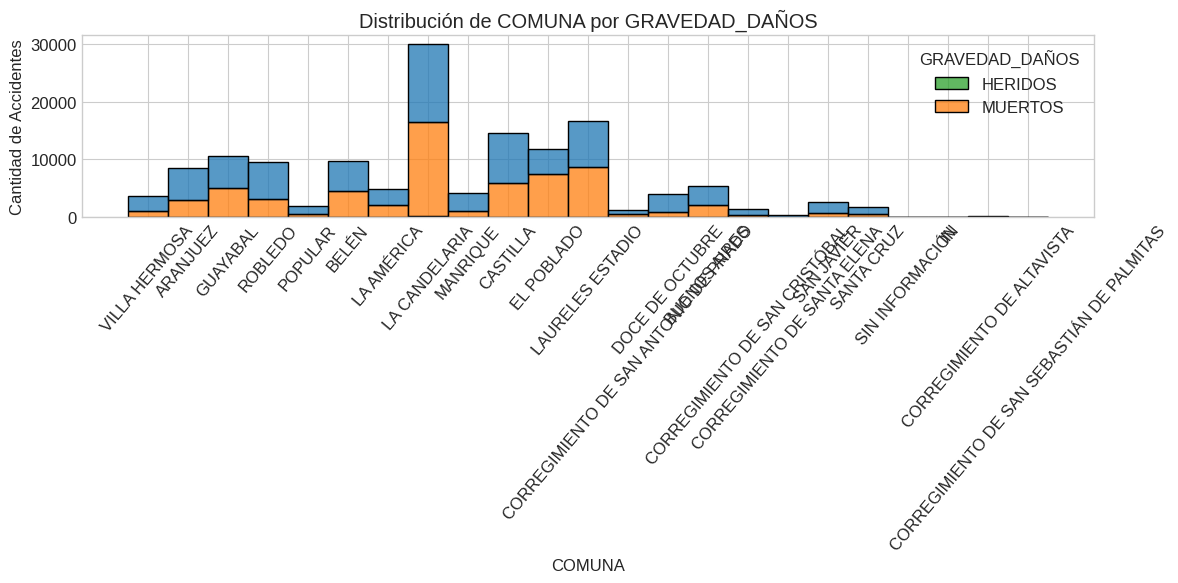

In [62]:
explorar_datos(df)

In [49]:
pd.read_sql("select COMUNA,COUNT(*) from mi_tabla  WHERE COD_MUNICIPIO = '1.0 ' AND COMUNA != 'SIN INFORMACIÓN	' GROUP BY COMUNA ORDER BY COUNT(*) DESC ", conn)

,COMUNA,COUNT(*)
0,LA CANDELARIA,29947
1,LAURELES ESTADIO,16631
2,CASTILLA,14500
3,EL POBLADO,11889
4,GUAYABAL,10603
5,BELÉN,9732
6,ROBLEDO,9501
7,ARANJUEZ,8509
8,BUENOS AIRES,5378
9,LA AMÉRICA,4820


In [ ]:
    # Guardar visualizaciones en archivos
    # Distribución de la variable objetivo -- GRAVEDAD_DAÑOS

    plt.figure(figsize=(8, 6))
    sns.countplot(x='GRAVEDAD_DAÑOS', data=data)
    plt.title('Distribución por Gravedad')
    plt.xlabel('DAÑOS/ HERIDOS / MUERTOS')
    plt.ylabel('Cantidad de Accidentes')
    plt.savefig('AccidentalidadVial_GRAVEDAD_DAÑOS.png', dpi=300, bbox_inches='tight')


    # Distribución de edades
    data_filtrada = data[data['COD_MUNICIPIO'].astype(str).str.strip() == '1.0']
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data_filtrada, x='COMUNA', hue='GRAVEDAD_DAÑOS', multiple='stack', bins=30)
    plt.title('Distribución de COMUNA por GRAVEDAD_DAÑOS')
    plt.xlabel('COMUNA')
    plt.ylabel('Cantidad de Pasajeros')
    plt.legend(title='GRAVEDAD_DAÑOS', labels=['DAÑOS', 'HERIDOS','MUERTOS' ])
    plt.savefig('AccidentalidadVial_GRAVEDAD_DAÑOS_COMUNA.png', dpi=300, bbox_inches='tight')